# Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import warnings
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import date, timedelta

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("Alpaca.env")

True

## Part 1 - Personal Finance Planner

### Collecting Crypto Prices Using the requests Library

In [3]:
# Set current amount of crypto assets
btc = 1.2
eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response = requests.get(btc_url)
data = response.json()
btc_price = float(data["data"]["1"]["quotes"]["CAD"]["price"])

# Fetch current ETH price
response = requests.get(eth_url)
data = response.json()
eth_price = float(data["data"]["1027"]["quotes"]["CAD"]["price"])

# Compute current value of my crpto
my_btc_value = btc * btc_price
my_eth_value = eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45379.88
The current value of your 5.3 ETH is $12683.18


###  Collecting Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
api_key = os.getenv("ALPACA_API_KEY")
api_secret = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
api = tradeapi.REST(api_key, api_secret, api_version='v2')

In [8]:
# Format current date as ISO format
today = pd. Timestamp ("2023-03-27",tz = 'America/New_York').isoformat ()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_bars (tickers,timeframe,start = today, end = today) .df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio ['symbol'] == 'AGG'].drop('symbol',
axis=1)
SPY = df_portfolio[df_portfolio ['symbol'] == 'SPY'].drop('symbol',
axis=1)

# Concatenate the ticker DataFrames
df_portfolio_year = pd. concat([AGG, SPY], axis = 1, keys = ["AGG", "SPY"])

# Preview DataFrame
df_portfolio_year

AGG                                            \
                            open   high   low   close   volume trade_count   
timestamp                                                                    
2023-03-27 04:00:00+00:00  99.39  99.52  99.2  99.245  3148829       16951   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-03-27 04:00:00+00:00  99.396988  398.12  398.92  395.56  397.15   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-03-27 04:00:00+00:00  37049061      347954  397.089709

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio.loc[df_portfolio['symbol'] == 'AGG', 'close'].iloc[-1]
spy_close_price = df_portfolio.loc[df_portfolio['symbol'] == 'SPY', 'close'].iloc[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.245
Current SPY closing price: $397.15


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19857.50
The current value of your 200 AGG shares is $19849.00


###  Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 5000

# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value
stocks_value = my_spy_value + my_agg_value

assets = {
    "crypto": crypto_value,
    "stocks": stocks_value,
}

# Create savings DataFrame
savings_data = {
    "Assets": ["Crypto", "Shares"],
    "Amount": [crypto_value, stocks_value]
}

df_savings = pd.DataFrame(savings_data)

# Display savings DataFrame
display(df_savings)

,Assets,Amount
0,Crypto,58063.053477
1,Shares,39706.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

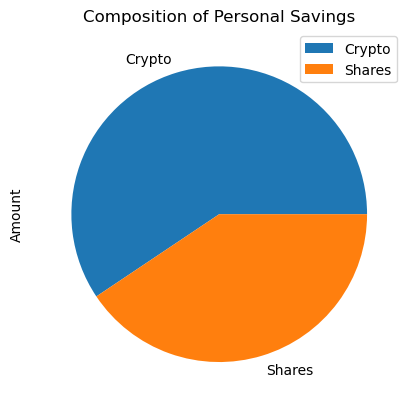

In [12]:
# Plot savings pie chart
df_savings.plot.pie(labels=df_savings["Assets"], y="Amount", title="Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + stocks_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal for your emergency fund.")
else:
    print(f"You are ${emergency_fund - total_savings:.2f} away from your emergency fund goal. Keep saving!")

Congratulations! You have enough money in your emergency fund.


##  Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Define start and end dates for data
start_date = pd.Timestamp(start_date, tz="America/New_York").isoformat()
end_date = pd.Timestamp(end_date, tz="America/New_York").isoformat()

# Get 5 years' worth of historical data for SPY and AGG
df_ticker = api.get_bars(tickers, timeframe, start=start_date, end=end_date).df
df_ticker_list = []
for ticker in tickers:
    df_ticker_list.append(df_ticker[df_ticker['symbol']==ticker].drop('symbol', axis=1))
df_ticker = pd.concat(df_ticker_list, axis=1, keys=tickers)

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio ['symbol'] == 'AGG'].drop('symbol',
axis=1)
SPY = df_portfolio[df_portfolio ['symbol'] == 'SPY'].drop('symbol',
axis=1)

# Concatenate the ticker DataFrames
df_portfolio_year = pd. concat([AGG, SPY], axis = 1, keys = ["AGG", "SPY"])

# Display sample data
df_portfolio_year.head()

AGG                                            \
                            open   high   low   close   volume trade_count   
timestamp                                                                    
2023-03-27 04:00:00+00:00  99.39  99.52  99.2  99.245  3148829       16951   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-03-27 04:00:00+00:00  99.396988  398.12  398.92  395.56  397.15   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-03-27 04:00:00+00:00  37049061      347954  397.089709

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Print the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [18]:
warnings.filterwarnings("ignore")
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001837,1.007901,1.000721,1.004033,1.005468,0.984638,0.998982,0.996229,0.996826,1.004283,...,0.991178,1.003369,0.999036,0.998597,1.000714,0.994133,1.001946,0.997250,0.995224,1.003333
2,1.000726,0.998295,1.005459,0.995741,0.998023,0.987850,1.004758,1.004682,1.002050,1.005737,...,0.992754,1.008733,0.999194,0.999806,0.999064,0.994169,1.002236,1.004412,0.989957,0.998251
3,1.002204,0.992155,1.003597,0.996535,0.992781,0.973654,1.007622,1.002346,1.005362,0.999463,...,0.986344,1.017363,0.996534,1.005302,1.004029,0.992855,1.003542,1.005583,0.995032,1.003996
4,1.008786,0.994006,1.000695,0.994631,0.984991,0.973710,0.999985,1.006253,1.005371,0.995348,...,0.981584,1.017926,1.003915,1.005258,0.998900,0.992076,1.005686,1.009644,0.993659,0.999465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.370830,16.043197,7.366509,25.066720,4.101936,2.099381,22.412230,14.526962,9.080589,11.444247,...,5.184402,7.684113,3.466584,3.363641,5.653800,10.664434,7.760737,9.235903,9.441215,6.425608
7557,9.333770,16.111871,7.346464,25.101887,4.093511,2.101398,22.361325,14.567352,9.026386,11.486405,...,5.164132,7.737743,3.469600,3.377038,5.624229,10.620851,7.823072,9.215308,9.505878,6.388591
7558,9.315730,16.103413,7.332731,25.318700,4.076954,2.094875,22.446105,14.579197,9.085799,11.518944,...,5.165833,7.756540,3.488874,3.374923,5.586126,10.629339,7.875490,9.189762,9.540106,6.409234
7559,9.294676,16.177916,7.297561,25.163857,4.064691,2.090450,22.410415,14.650749,9.076304,11.503874,...,5.177134,7.739862,3.467896,3.368588,5.599526,10.635431,7.883352,9.185235,9.567813,6.415441


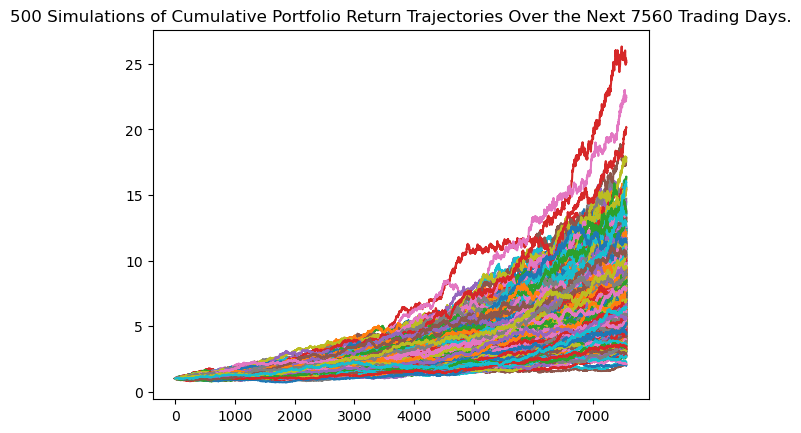

In [19]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

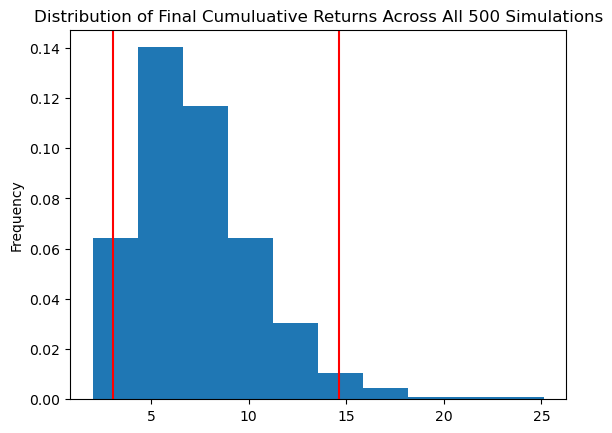

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

###  Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tb1 = MC_thirtyyear. summarize_cumulative_return ()

# Print summary statistics
print (tb1)

count           500.000000
mean              7.325056
std               3.161799
min               2.006724
25%               5.057481
50%               6.835002
75%               8.964674
max              25.117733
95% CI Lower      3.057941
95% CI Upper     14.604609
Name: 7560, dtype: float64


### Calculating the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tb1[8]*20000,2)
ci_upper = round(tb1[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $61158.81 and $292092.18


###  Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tb1[8]*30000,2)
ci_upper = round(tb1[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $91738.22 and $438138.27


##  Optional Challenge - Early Retirement

### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
warnings.filterwarnings("ignore")
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994402,1.003692,1.001405,0.999622,0.997978,1.003958,1.002985,0.999307,1.000121,1.003013,...,0.997517,1.002040,0.992284,0.996959,1.000227,1.002045,1.003720,1.005450,0.993638,0.996372
2,0.997647,1.010315,0.997010,1.002881,1.000302,0.993740,0.995518,0.999981,0.999717,1.005287,...,0.999547,1.001285,0.996708,0.998788,0.993755,1.007759,1.003926,1.005173,0.995334,0.989157
3,0.988994,1.005224,1.001429,1.004148,0.998943,0.998119,1.001671,0.998957,1.001719,1.004183,...,1.005288,0.999636,0.997850,0.999452,0.990265,1.007509,1.005386,1.003827,0.999407,0.984442
4,0.994694,1.014189,1.000222,1.004423,0.996151,1.002560,1.010200,0.997000,1.003699,1.005052,...,1.002923,1.007616,0.993551,0.991081,0.993893,1.015188,1.007784,1.007729,0.998821,0.982331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.757086,1.882961,1.766049,2.118388,1.389082,1.341300,1.462852,1.117783,1.266019,1.597563,...,1.463454,1.642659,1.539451,1.329027,1.112459,1.501024,1.076317,1.263602,1.713019,1.294343
1257,1.760575,1.888719,1.776477,2.130843,1.380939,1.348436,1.465994,1.113751,1.279758,1.602605,...,1.461154,1.657807,1.530410,1.334934,1.112758,1.499813,1.070325,1.261178,1.699983,1.296667
1258,1.750328,1.868362,1.783949,2.113411,1.378286,1.337664,1.455853,1.102271,1.273599,1.600923,...,1.464957,1.663762,1.530830,1.326507,1.111414,1.495049,1.062745,1.266414,1.695340,1.303883
1259,1.757826,1.877470,1.789871,2.124140,1.380963,1.331700,1.450530,1.111638,1.276088,1.604909,...,1.471890,1.677336,1.524380,1.324582,1.108535,1.500963,1.061599,1.264669,1.695225,1.307086


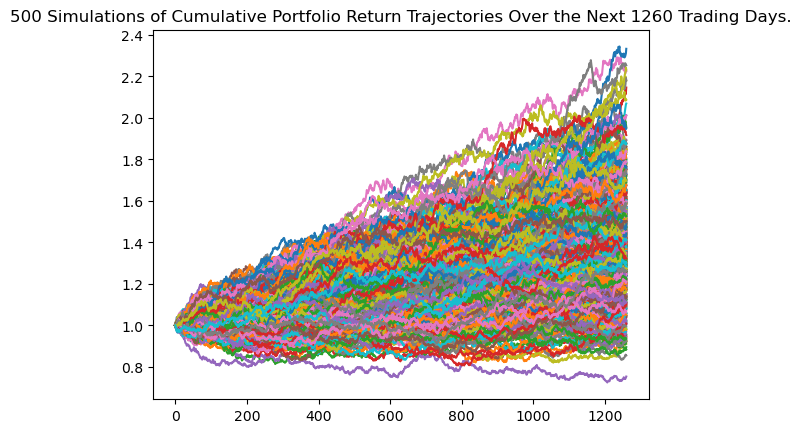

In [26]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

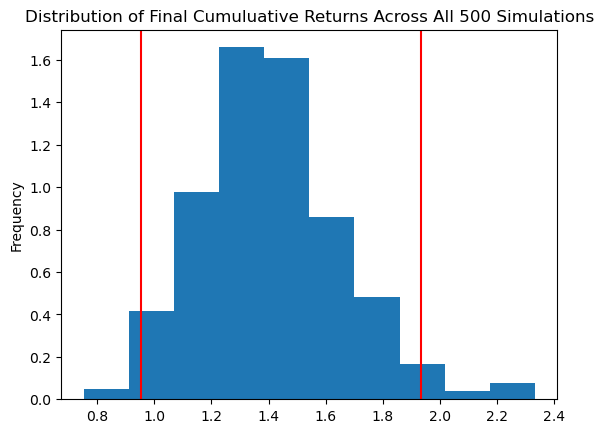

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tb1 = MC_fiveyear. summarize_cumulative_return ()

# Print summary statistics
print (tb1)

count           500.000000
mean              1.410047
std               0.248882
min               0.753330
25%               1.250585
50%               1.388519
75%               1.550508
max               2.332820
95% CI Lower      0.951997
95% CI Upper      1.933871
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tb1[8]*60000,2)
ci_upper_five = round(tb1[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57119.8 and $116032.23


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
warnings.filterwarnings("ignore")
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999812,1.003077,1.002619,0.995159,1.002888,0.995224,0.999400,0.993856,0.997562,1.004564,...,0.997830,1.003413,1.002962,0.990972,1.005506,1.007016,1.004938,1.001756,0.990664,1.003208
2,0.997285,0.998325,0.994863,0.993566,1.010691,0.987338,0.999372,0.996003,0.998869,1.003317,...,0.997896,1.006905,1.005829,0.990433,1.010471,1.005830,1.010727,1.006958,0.993494,1.002996
3,1.003118,0.996099,0.994658,1.001761,1.000784,0.996468,0.996969,0.994717,0.998549,0.996653,...,0.990499,1.003186,0.999024,0.991497,1.004941,1.011364,1.012145,1.005076,0.991258,0.998561
4,0.996168,1.009019,0.988786,1.005660,0.996932,0.998773,0.996535,0.992059,1.001366,0.995201,...,0.993956,1.006596,1.000016,0.983972,1.006931,1.000225,1.007373,1.000557,0.990370,0.998379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.057546,1.971285,1.665059,2.612194,1.678203,1.770497,1.681661,1.775998,2.880637,2.050513,...,1.657261,1.648100,2.076539,2.584349,1.975433,2.047339,1.880072,2.374038,1.141979,1.538534
2517,2.057879,1.977849,1.657447,2.634749,1.683523,1.765053,1.691811,1.768250,2.887201,2.022618,...,1.652128,1.637731,2.063834,2.572185,1.964804,2.051877,1.889203,2.366866,1.145053,1.548922
2518,2.055378,1.978638,1.662322,2.656393,1.680799,1.758985,1.693558,1.766675,2.911213,2.022174,...,1.646594,1.627922,2.061221,2.578473,1.957254,2.042250,1.881880,2.387914,1.144698,1.553580
2519,2.044830,1.981890,1.661033,2.649579,1.681669,1.770378,1.688221,1.778198,2.904366,2.018510,...,1.644863,1.626620,2.077321,2.574087,1.957223,2.047269,1.877381,2.387406,1.143399,1.536075


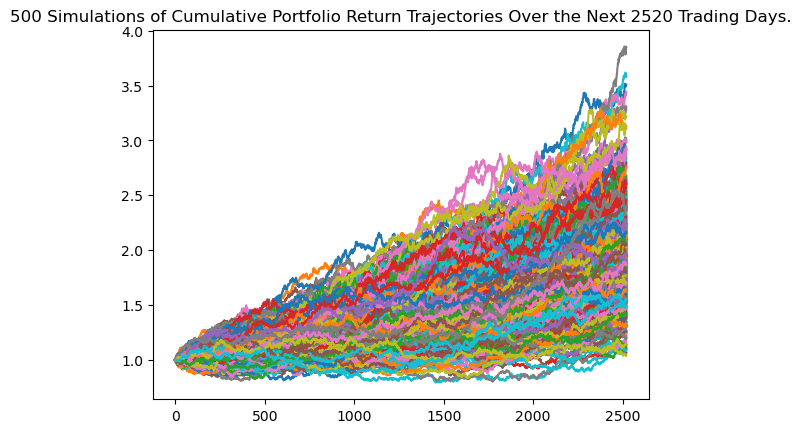

In [32]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

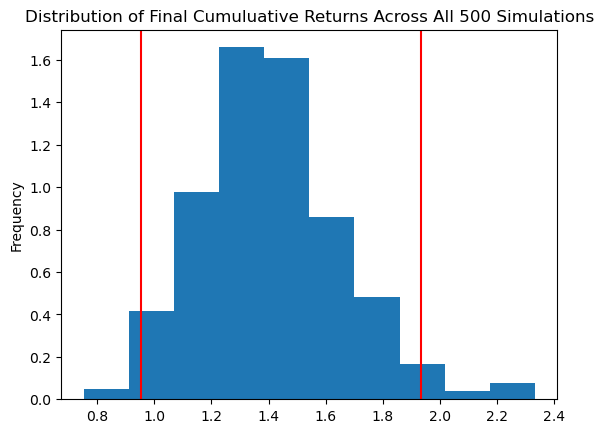

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tb1 = MC_tenyear. summarize_cumulative_return ()

# Print summary statistics
print (tb1)

count           500.000000
mean              1.919437
std               0.441904
min               1.046171
25%               1.610339
50%               1.870015
75%               2.162373
max               3.849018
95% CI Lower      1.197764
95% CI Upper      2.931377
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tb1[8]*60000,2)
ci_upper_ten = round(tb1[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $71865.85 and $175882.6
